![Logo](Technikklein.png)

# Task 9: Regression
### Data Science


##### Dozent: Prof. Dr. Stefan Edlich
##### Medieninformatik
##### Hochschule Emden/Leer
##### Sommersemester 2021
   
_____


### Ex. 1 Linear Regression

Make up your own personal dataset and predict the regression curve.


(I am imagining data from a survey where people have been asked to rate how well they like different ingredients in a fruit cake. The results would have been translated to a scale of 1-7, whereas 1 is "I don't like that at all" and 7 is "This is my favorite thing in a fruit cake". From this, one could try to predict how well people like raisins in their fruitcake based on how well they like marzipan. Of course, I rigged the dataset so that people who like marzipan dislike raisins and the other way around and also the stronger they like something, they dislike the other.)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("fruitcakedata.csv")

df = pd.DataFrame(data)

print (df)

         Name  Marzipan  Raisins
0        Anna         6        2
1         Bob         3        3
2        Caro         1        7
3      Daniel         5        2
4        Ella         1        6
5        Fred         2        5
6        Gaby         3        4
7       Harry         4        3
8      Isabel         5        2
9       Jonas         6        2
10      Karen         7        1
11      Lauri         1        5
12    Margret         5        2
13    Norbert         4        3
14       Olga         3        3
15    Philipp         2        5
16      Quinn         1        6
17     Robert         2        6
18      Sonja         3        4
19        Tom         4        4
20     Ursula         5        1
21   Valentin         6        1
22      Wanda         7        2
23      Xaver         1        5
24     Yasmin         5        3
25  Zacharias         4        3


#### First let's have a preview if I rigged the dataset right (should be obvious already).

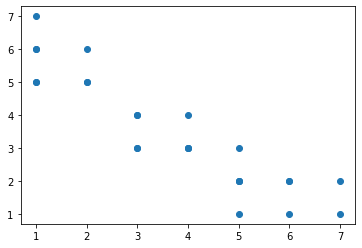

In [2]:
plot.scatter(df.Marzipan, df.Raisins)

#### Then assign x and y from the dataset.

In [3]:
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
print(x)
print(y)

[[6]
 [3]
 [1]
 [5]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [1]
 [5]
 [4]
 [3]
 [2]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [1]
 [5]
 [4]]
[2 3 7 2 6 5 4 3 2 2 1 5 2 3 3 5 6 6 4 4 1 1 2 5 3 3]


#### Then split the data into Training and Testing data.

In [4]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/4, random_state = 0)
xTrain.reshape(19, 1)
print(xTrain)
print(yTrain)

[[4]
 [3]
 [4]
 [1]
 [3]
 [7]
 [4]
 [5]
 [5]
 [3]
 [1]
 [6]
 [4]
 [1]
 [5]
 [6]
 [6]
 [2]
 [5]]
[3 4 4 6 3 1 3 3 2 4 6 2 3 5 2 2 1 5 2]


#### Then implement the regression and check whether predictions are good (x+y should be around 7).

In [5]:
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)
print(xTest)
yPrediction = linearRegressor.predict(xTest)
print(yPrediction)

[[1]
 [5]
 [3]
 [2]
 [2]
 [1]
 [7]]
[5.55    2.375   3.9625  4.75625 4.75625 5.55    0.7875 ]


#### Then visualize it. Looks good for this tiny dataset! :)

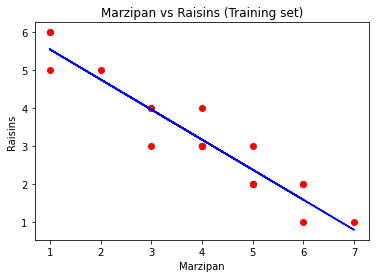

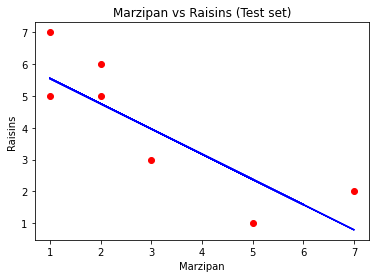

In [6]:
plot.scatter(xTrain, yTrain, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Marzipan vs Raisins (Training set)')
plot.xlabel('Marzipan')
plot.ylabel('Raisins')
plot.show()
plot.scatter(xTest, yTest, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Marzipan vs Raisins (Test set)')
plot.xlabel('Marzipan')
plot.ylabel('Raisins')
plot.show()


______________________________


### Ex. 2 Logistic Regression
You are walking in the forrest and see an iris and measure:

4.8,2.5,5.3,2.4
Is this an Iris Virginica or not?

The absolute minimum is to derive 4 probabilites for each feature. Bu tit would be best to evaluate all 4 values in a (combined) equation to get one single probability for Iris Virginica!

#### First, import the Iris Dataset.

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Then get the data for the regression (x is the iris data and y the target. Since we want to find out whether our plant is of the class Virginicaor not, we are only interested in Virginica data).

In [10]:
x = iris['data']
y = (iris['target'] == 2).astype(int) # 2 is the value for the class Virginica

log_reg = LogisticRegression()
log_reg.fit(x,y)

LogisticRegression()

#### Then, we calculate the probability that our flower is a Virginica - 1 is clear, it is!

In [9]:
log_reg.predict([[4.8, 2.5, 5.3, 2.4]])

array([1])